In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load the data

In [3]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [4]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

In [5]:
def compute_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    N = len(y)
    M = y - tx @ w
    M = M**2
    print("aaaaaaaaaaaa", np.shape(y), np.shape(np.dot(tx, w)), np.shape(M))
    
    return 1/2*N*np.sum(M)

compute_loss(y, tx, np.array([73,12]))

aaaaaaaaaaaa (10000,) (10000,) (10000,)


1652385738.5620773

# 2. Grid Search

Fill in the function `grid_search()` below:

In [6]:
# from costs import *


def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    for i in range(len(grid_w0)):
        for j in range(len(grid_w1)):
            losses[i][j] = compute_loss(y, tx, np.array([grid_w0[i], grid_w1[j]]))
    return losses

Let us play with the grid search demo now!

aaaaaaaaaaaa (10000,) (10000,) (10000,)
aaaaaaaaaaaa (10000,) (10000,) (10000,)
aaaaaaaaaaaa (10000,) (10000,) (10000,)
aaaaaaaaaaaa (10000,) (10000,) (10000,)
aaaaaaaaaaaa (10000,) (10000,) (10000,)
aaaaaaaaaaaa (10000,) (10000,) (10000,)
aaaaaaaaaaaa (10000,) (10000,) (10000,)
aaaaaaaaaaaa (10000,) (10000,) (10000,)
aaaaaaaaaaaa (10000,) (10000,) (10000,)
aaaaaaaaaaaa (10000,) (10000,) (10000,)
aaaaaaaaaaaa (10000,) (10000,) (10000,)
aaaaaaaaaaaa (10000,) (10000,) (10000,)
aaaaaaaaaaaa (10000,) (10000,) (10000,)
aaaaaaaaaaaa (10000,) (10000,) (10000,)
aaaaaaaaaaaa (10000,) (10000,) (10000,)
aaaaaaaaaaaa (10000,) (10000,) (10000,)
aaaaaaaaaaaa (10000,) (10000,) (10000,)
aaaaaaaaaaaa (10000,) (10000,) (10000,)
aaaaaaaaaaaa (10000,) (10000,) (10000,)
aaaaaaaaaaaa (10000,) (10000,) (10000,)
aaaaaaaaaaaa (10000,) (10000,) (10000,)
aaaaaaaaaaaa (10000,) (10000,) (10000,)
aaaaaaaaaaaa (10000,) (10000,) (10000,)
aaaaaaaaaaaa (10000,) (10000,) (10000,)
aaaaaaaaaaaa (10000,) (10000,) (10000,)


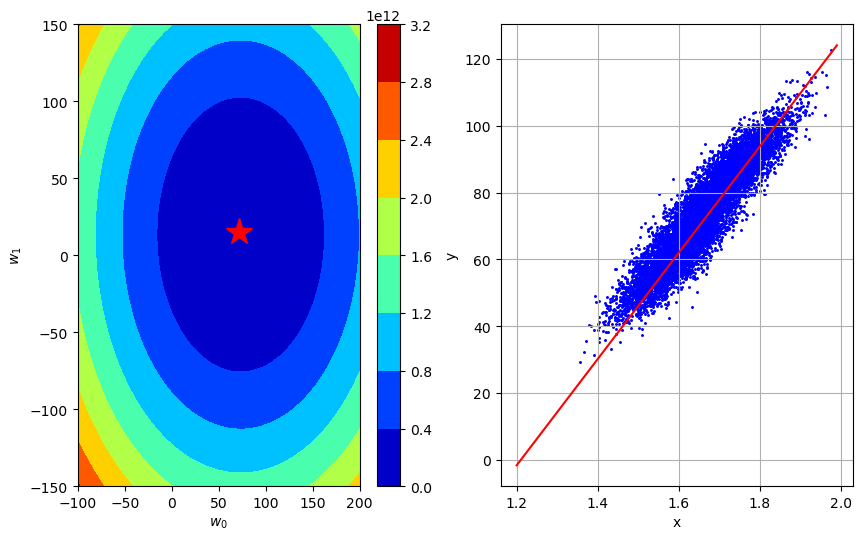

In [7]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [7]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    N = len(y)
    return -1/N*(tx.T @ (y - tx @ w))

Please fill in the functions `gradient_descent` below:

In [8]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    print(np.shape(w), np.shape(tx), np.shape(y))
    for n_iter in range(max_iters):
        loss = compute_loss(y, tx, w)
        gradient = compute_gradient(y, tx, w)
        w = w - gamma*gradient
        ws.append(w)
        losses.append(loss)
        print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [9]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

(2,) (10000, 2) (10000,)
GD iter. 0/49: loss=279223671275.91675, w0=7.329392200210517, w1=1.3479712434988966
GD iter. 1/49: loss=226463505603.00034, w0=13.925845180399982, w1=2.5611453626479044
GD iter. 2/49: loss=183727771407.93805, w0=19.862652862570503, w1=3.6530020698820107
GD iter. 3/49: loss=149111826709.9376, w0=25.205779776523972, w1=4.63567310639271
GD iter. 4/49: loss=121072911504.5572, w0=30.014593999082095, w1=5.520077039252339
GD iter. 5/49: loss=98361390188.19908, w0=34.3425267993844, w1=6.316040578826005
GD iter. 6/49: loss=79965057921.94904, w0=38.23766631965648, w1=7.032407764442305
GD iter. 7/49: loss=65064028786.28646, w0=41.74329188790135, w1=7.677138231496976
GD iter. 8/49: loss=52994195186.39981, w0=44.89835489932173, w1=8.25739565184618
GD iter. 9/49: loss=43217629970.491615, w0=47.737911609600076, w1=8.779627330160464
GD iter. 10/49: loss=35298612145.60597, w0=50.29351264885059, w1=9.24963584064332
GD iter. 11/49: loss=28884207707.448597, w0=52.59355358417605, w

In [10]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [11]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """
    
    for minibatch_y, minibatch_tx in batch_iter(y, tx, 50):
        batch_tx = minibatch_tx
        batch_y = minibatch_y

    return compute_gradient(batch_y, batch_tx, w)



In [12]:
def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        loss = compute_loss(y, tx, w)
        gradient = compute_stoch_gradient(y, tx, w)
        w = w - gamma*gradient
        ws.append(w)
        losses.append(loss)

        print(
            "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [13]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 50

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=73.29392200210518, w0=7.062461304141848, w1=0.19008059156954443
SGD iter. 1/49: loss=66.23146069796334, w0=13.647373116693387, w1=1.096688016589131
SGD iter. 2/49: loss=59.6465488854118, w0=19.452913339247207, w1=1.5046751256554727
SGD iter. 3/49: loss=53.84100866285798, w0=25.041506018143675, w1=2.9518784146531942
SGD iter. 4/49: loss=48.2524159839615, w0=30.074282460575642, w1=4.911500906821737
SGD iter. 5/49: loss=43.21963954152954, w0=34.47034356252487, w1=6.483717399137265
SGD iter. 6/49: loss=38.82357843958032, w0=38.465145584998744, w1=7.6107193507049775
SGD iter. 7/49: loss=34.82877641710644, w0=41.96269275228088, w1=8.288358594671521
SGD iter. 8/49: loss=31.331229249824304, w0=45.160462178817674, w1=8.64737022029695
SGD iter. 9/49: loss=28.133459823287513, w0=48.05072778847739, w1=8.97817242332928
SGD iter. 10/49: loss=25.243194213627795, w0=50.6135076622766, w1=9.729087434730243
SGD iter. 11/49: loss=22.68080918648248, w0=52.926868747381775, w1=10.1646721

In [14]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [15]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [16]:
y.shape, tx.shape

((202,), (202, 2))

In [17]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()


end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=74.06780585492638, w0=51.847464098448484, w1=7.724426406192441
GD iter. 1/49: loss=22.220341756477886, w0=67.401703327983, w1=10.041754328050121
GD iter. 2/49: loss=8.540676439415343, w0=72.06797509684336, w1=10.736952704607413
GD iter. 3/49: loss=6.904828366810239, w0=73.46785662750146, w1=10.945512217574594
GD iter. 4/49: loss=6.674709716875216, w0=73.88782108669889, w1=11.00808007146475
GD iter. 5/49: loss=6.644814813344382, w0=74.01381042445813, w1=11.026850427631796
GD iter. 6/49: loss=6.639117501635084, w0=74.05160722578589, w1=11.03248153448191
GD iter. 7/49: loss=6.637802926368862, w0=74.06294626618423, w1=11.034170866536943
GD iter. 8/49: loss=6.637503390841276, w0=74.06634797830372, w1=11.034677666153454
GD iter. 9/49: loss=6.637417848906234, w0=74.06736849193958, w1=11.034829706038407
GD iter. 10/49: loss=6.637392186325722, w0=74.06767464603033, w1=11.034875318003893
GD iter. 11/49: loss=6.637384487551568, w0=74.06776649225756, w1=11.034889001593537
GD it

In [18]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [19]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    loss = y - tx @ w
    N = len(y)
    subgradient = -1/N*np.array([np.sum(np.sign(loss)),-np.sum(x[1]*np.sign(loss))])
    return subgradient

    

In [20]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):

        loss = compute_loss(y, tx, w)
        gradient = compute_subgradient_mae(y, tx, w)
        w = w - gamma*gradient
        ws.append(w)
        losses.append(loss)
        print(
            "SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [21]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=74.06780585492638, w0=0.7, w1=0.24097991466664806
SubGD iter. 1/499: loss=73.36780585492637, w0=1.4, w1=0.4819598293332961
SubGD iter. 2/499: loss=72.66780585492637, w0=2.0999999999999996, w1=0.7229397439999442
SubGD iter. 3/499: loss=71.96780585492638, w0=2.8, w1=0.9639196586665922
SubGD iter. 4/499: loss=71.26780585492638, w0=3.5, w1=1.2048995733332404
SubGD iter. 5/499: loss=70.56780585492639, w0=4.2, w1=1.4458794879998884
SubGD iter. 6/499: loss=69.86780585492637, w0=4.9, w1=1.6868594026665364
SubGD iter. 7/499: loss=69.16780585492637, w0=5.6000000000000005, w1=1.9278393173331845
SubGD iter. 8/499: loss=68.46780585492638, w0=6.300000000000001, w1=2.1688192319998327
SubGD iter. 9/499: loss=67.76780585492638, w0=7.000000000000001, w1=2.4097991466664808
SubGD iter. 10/499: loss=67.06780585492636, w0=7.700000000000001, w1=2.650779061333129
SubGD iter. 11/499: loss=66.36780585492637, w0=8.4, w1=2.891758975999777
SubGD iter. 12/499: loss=65.66780585492637, w0=9.1,

In [22]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [24]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Compute a stochastic subgradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        
        loss = compute_loss(y, tx, w)
        
        for minibatch_y, minibatch_tx in batch_iter(y, tx, 1):
            batch_tx = minibatch_tx
            batch_y = minibatch_y
            
        gradient = compute_subgradient_mae(batch_y, batch_tx, w)

        w = w - gamma*gradient

        ws.append(w)
        losses.append(loss)


        print(
            "SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [25]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 10

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=74.06780585492638, w0=0.7, w1=0.24097991466664814
SubSGD iter. 1/499: loss=73.36780585492637, w0=1.4, w1=0.4819598293332963
SubSGD iter. 2/499: loss=72.66780585492637, w0=2.0999999999999996, w1=0.7229397439999444
SubSGD iter. 3/499: loss=71.96780585492638, w0=2.8, w1=0.9639196586665926
SubSGD iter. 4/499: loss=71.26780585492638, w0=3.5, w1=1.2048995733332406
SubSGD iter. 5/499: loss=70.56780585492639, w0=4.2, w1=1.4458794879998886
SubSGD iter. 6/499: loss=69.86780585492637, w0=4.9, w1=1.6868594026665367
SubSGD iter. 7/499: loss=69.16780585492637, w0=5.6000000000000005, w1=1.9278393173331847
SubSGD iter. 8/499: loss=68.46780585492638, w0=6.300000000000001, w1=2.1688192319998327
SubSGD iter. 9/499: loss=67.76780585492638, w0=7.000000000000001, w1=2.4097991466664808
SubSGD iter. 10/499: loss=67.06780585492636, w0=7.700000000000001, w1=2.650779061333129
SubSGD iter. 11/499: loss=66.36780585492637, w0=8.4, w1=2.891758975999777
SubSGD iter. 12/499: loss=65.6678058549

In [26]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>